In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import  datetime as datetime

In [4]:
claims = pd.read_csv("H:/data science full/analytics lab/python prog/case studies and assignments/5. Pandas Case Study 3 - Insurance Claims Case Study/5. Pandas Case Study 3 - Insurance Claims Case Study/claims.csv")
demo = pd.read_csv("H:/data science full/analytics lab/python prog/case studies and assignments/5. Pandas Case Study 3 - Insurance Claims Case Study/5. Pandas Case Study 3 - Insurance Claims Case Study/cust_demographics.csv")
claims.head(2)
demo.head(3)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver


In [5]:
comb_df = pd.merge(right = claims,
                   left = demo, 
                   right_on = "customer_id", 
                   left_on = "CUST_ID",
                   how = "outer"
                  )
comb_df.drop(columns = ["customer_id"], inplace = True)
comb_df.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [6]:
comb_df.info()
comb_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1106
Data columns (total 15 columns):
CUST_ID                1092 non-null float64
gender                 1092 non-null object
DateOfBirth            1092 non-null object
State                  1092 non-null object
Contact                1092 non-null object
Segment                1092 non-null object
claim_id               1100 non-null float64
incident_cause         1100 non-null object
claim_date             1100 non-null object
claim_area             1100 non-null object
police_report          1100 non-null object
claim_type             1100 non-null object
claim_amount           1035 non-null object
total_policy_claims    1090 non-null float64
fraudulent             1100 non-null object
dtypes: float64(3), object(12)
memory usage: 138.4+ KB


CUST_ID                15
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
claim_id                7
incident_cause          7
claim_date              7
claim_area              7
police_report           7
claim_type              7
claim_amount           72
total_policy_claims    17
fraudulent              7
dtype: int64

In [7]:
comb_df["DateOfBirth"] = pd.to_datetime(comb_df.DateOfBirth, format = "%d-%b-%y")
comb_df.loc[(comb_df.DateOfBirth.dt.year > 2020),"DateOfBirth"]=comb_df[comb_df.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))
comb_df["claim_date"] = pd.to_datetime(comb_df.claim_date, format = "%m/%d/%Y")
comb_df["Contact"] = pd.to_numeric(comb_df.Contact.str.replace("-",""),downcast='float')
comb_df["claim_amount"] = pd.to_numeric(comb_df.claim_amount.str.slice(1).astype(float))
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1106
Data columns (total 15 columns):
CUST_ID                1092 non-null float64
gender                 1092 non-null object
DateOfBirth            1092 non-null datetime64[ns]
State                  1092 non-null object
Contact                1092 non-null float32
Segment                1092 non-null object
claim_id               1100 non-null float64
incident_cause         1100 non-null object
claim_date             1100 non-null datetime64[ns]
claim_area             1100 non-null object
police_report          1100 non-null object
claim_type             1100 non-null object
claim_amount           1035 non-null float64
total_policy_claims    1090 non-null float64
fraudulent             1100 non-null object
dtypes: datetime64[ns](2), float32(1), float64(4), object(8)
memory usage: 134.1+ KB


In [8]:
comb_df

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No
5,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,91609100.0,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No
6,19269962.0,Male,1977-05-13,NV,9.568719e+09,Gold,22890252.0,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No
7,19269962.0,Male,1977-05-13,NV,9.568719e+09,Gold,39219616.0,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No
8,21831191.0,Male,1977-05-17,NH,4.197128e+09,Gold,24050443.0,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes
9,21831191.0,Male,1977-05-17,NH,4.197128e+09,Gold,91475471.0,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No


In [9]:
comb_df["flag"] = np.where(comb_df.police_report == "No", 0 ,
                    np.where(comb_df.police_report == "Yes", 1, np.nan))
comb_df.drop(columns = ["police_report"], inplace = True)
comb_df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,Material only,2980.0,1.0,No,0.0
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Material only,2980.0,3.0,No,NaN
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,Material only,3369.5,1.0,Yes,0.0
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,Material only,1950.0,6.0,No,0.0
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,Material only,1680.0,1.0,No,0.0


In [10]:
comb_df = comb_df.groupby('CUST_ID').first()
comb_df

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
CUST_ID,,,,,,,,,,,,,,
154557.0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,NaN,1.0,Yes,0.0
263204.0,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.0,1.0,Yes,0.0
287476.0,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Material only,1621.5,2.0,Yes,NaN
441097.0,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Material and injury,37040.0,1.0,No,1.0
524545.0,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,Injury only,35250.0,3.0,No,0.0
608461.0,Male,1994-12-17,AR,9.631873e+09,Platinum,7180084.0,Crime,2018-07-14,Auto,Material only,2630.0,1.0,No,0.0
684748.0,Male,1977-08-03,AK,6.133853e+09,Gold,7238381.0,Other driver error,2018-07-14,Auto,Material only,2920.0,2.0,No,0.0
804961.0,Female,1997-12-07,AL,4.877234e+09,Gold,87184588.0,Other causes,2017-10-10,Auto,Material and injury,21190.0,1.0,No,0.0
885337.0,Male,1962-02-17,HI,3.215345e+09,Platinum,86240106.0,Driver error,2017-07-01,Auto,Material only,2490.0,2.0,No,0.0


In [11]:
cat_col = ["gender","State","Segment","incident_cause","claim_area","claim_type","fraudulent","flag"]
con_col = ["claim_amount"]
for col in cat_col:
    comb_df[col] = comb_df[col].fillna(comb_df[col].mode()[0])
comb_df[con_col] = comb_df[con_col].fillna(comb_df[con_col].mean())
comb_df.isnull().sum()

gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                7
incident_cause          0
claim_date              7
claim_area              0
claim_type              0
claim_amount            0
total_policy_claims    17
fraudulent              0
flag                    0
dtype: int64

In [12]:
now = pd.to_datetime('now')
now
comb_df["Age"]=(now - comb_df['DateOfBirth']).astype('<m8[Y]') #<m8[Y] is datetime64
comb_df.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age
CUST_ID,,,,,,,,,,,,,,,
154557.0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,12470.498519,1.0,Yes,0.0,41.0
263204.0,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,0.0,47.0
287476.0,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Material only,1621.500000,2.0,Yes,0.0,31.0
441097.0,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Material and injury,37040.000000,1.0,No,1.0,48.0
524545.0,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,0.0,39.0


In [13]:
comb_df["Age_grp"] = np.where(comb_df.Age < 18, "Children",
                        np.where(comb_df.Age < 30, "Youth",
                         np.where(comb_df.Age < 60, "Adult",
                          np.where(comb_df.Age < 100, "Senior", "NaN"
                           
                          )
                         )
                        )
                       )
comb_df["Age_grp"] = comb_df["Age_grp"].fillna(comb_df["Age_grp"].mode())
comb_df.Age_grp.value_counts()
comb_df

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_grp
CUST_ID,,,,,,,,,,,,,,,,
154557.0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,12470.498519,1.0,Yes,0.0,41.0,Adult
263204.0,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,0.0,47.0,Adult
287476.0,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Material only,1621.500000,2.0,Yes,0.0,31.0,Adult
441097.0,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Material and injury,37040.000000,1.0,No,1.0,48.0,Adult
524545.0,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,0.0,39.0,Adult
608461.0,Male,1994-12-17,AR,9.631873e+09,Platinum,7180084.0,Crime,2018-07-14,Auto,Material only,2630.000000,1.0,No,0.0,25.0,Youth
684748.0,Male,1977-08-03,AK,6.133853e+09,Gold,7238381.0,Other driver error,2018-07-14,Auto,Material only,2920.000000,2.0,No,0.0,42.0,Adult
804961.0,Female,1997-12-07,AL,4.877234e+09,Gold,87184588.0,Other causes,2017-10-10,Auto,Material and injury,21190.000000,1.0,No,0.0,22.0,Youth
885337.0,Male,1962-02-17,HI,3.215345e+09,Platinum,86240106.0,Driver error,2017-07-01,Auto,Material only,2490.000000,2.0,No,0.0,58.0,Adult


In [14]:
round(comb_df.groupby(by = "Segment")[["claim_amount"]].mean(),3)

,claim_amount
Segment,
Gold,12755.711
Platinum,12370.139
Silver,12271.163


In [15]:
comb_df.loc[comb_df.claim_date < "2018-09-10",:].groupby("incident_cause")["claim_amount"].sum().add_prefix("total_")

incident_cause
total_Crime                 7.244625e+05
total_Driver error          3.264286e+06
total_Natural causes        1.312706e+06
total_Other causes          3.725038e+06
total_Other driver error    3.318806e+06
Name: claim_amount, dtype: float64

In [16]:
comb_df.loc[(comb_df.incident_cause.str.lower().str.contains("driver") 
             & ((comb_df.State == "TX") | (comb_df.State == "DE") | (comb_df.State == "AK"))),:].groupby(by = "State")["State"].count()

State
AK    10
DE    15
TX    10
Name: State, dtype: int64

In [17]:
f1 = comb_df.groupby(by = ["gender","Segment"])["claim_amount"].sum().reset_index()
f1

,gender,Segment,claim_amount
0,Female,Gold,2.122234e+06
1,Female,Platinum,2.381974e+06
2,Female,Silver,1.935970e+06
3,Male,Gold,2.622890e+06
4,Male,Platinum,2.120756e+06
5,Male,Silver,2.346666e+06


In [18]:
res = f1.pivot(index = "Segment", columns = "gender", values = "claim_amount")
res

gender,Female,Male
Segment,,
Gold,2.122234e+06,2.622890e+06
Platinum,2.381974e+06,2.120756e+06
Silver,1.935970e+06,2.346666e+06


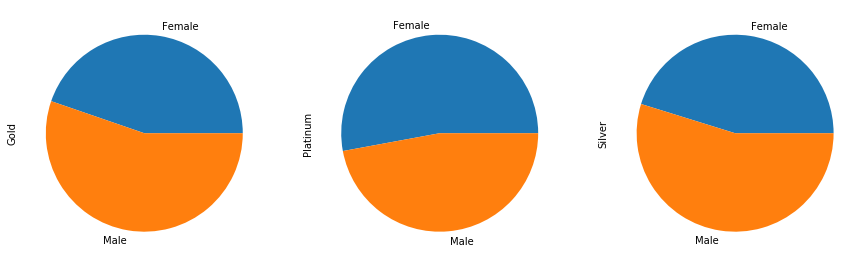

In [19]:
res.T.plot(kind = "pie", subplots = True, legend = False, figsize = (15,8))
plt.show()

In [20]:
f2 = comb_df.loc[(comb_df.incident_cause.str.lower().str.contains("driver"))].groupby(by = "gender")[["gender"]].count().add_prefix("CountOf_").reset_index()
f2

,gender,CountOf_gender
0,Female,221
1,Male,280


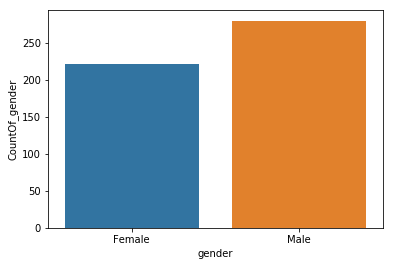

In [21]:
sns.barplot(x = "gender", y = "CountOf_gender", data = f2 )
plt.show()

In [22]:
f3 = comb_df.groupby(by = "Age_grp")[["fraudulent"]].count()
f3
x1 = comb_df.Age_grp.value_counts()
x1

Adult     804
Youth     275
Senior      6
Name: Age_grp, dtype: int64

In [23]:
comb_df.head()
comb_df.columns 
comb_df.reset_index()
comb_df.columns 

Index(['gender', 'DateOfBirth', 'State', 'Contact', 'Segment', 'claim_id',
       'incident_cause', 'claim_date', 'claim_area', 'claim_type',
       'claim_amount', 'total_policy_claims', 'fraudulent', 'flag', 'Age',
       'Age_grp'],
      dtype='object')

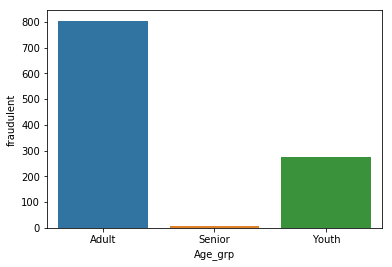

In [24]:
f3['Age_grp'] = f3.index
%matplotlib inline
import seaborn as sns
sns.barplot(x='Age_grp', y='fraudulent', data=f3)

In [25]:
comb_df.claim_date.dropna()

comb_df.dropna(subset=['claim_date'], how='all', inplace=True)
comb_df.isnull().sum()

gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
incident_cause          0
claim_date              0
claim_area              0
claim_type              0
claim_amount            0
total_policy_claims    10
fraudulent              0
flag                    0
Age                     0
Age_grp                 0
dtype: int64

In [26]:
comb_df['Monthly'] = comb_df['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
comb_df['Yearly' ] = comb_df['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))
comb_df.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_grp,Monthly,Yearly
CUST_ID,,,,,,,,,,,,,,,,,,
154557.0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,12470.498519,1.0,Yes,0.0,41.0,Adult,April,2018
263204.0,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,0.0,47.0,Adult,April,2018
287476.0,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Material only,1621.500000,2.0,Yes,0.0,31.0,Adult,October,2017
441097.0,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Material and injury,37040.000000,1.0,No,1.0,48.0,Adult,March,2018
524545.0,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,0.0,39.0,Adult,July,2018


In [27]:
customer_claims_group= round(comb_df.groupby(by='Monthly')[['claim_amount']].sum(),2)
customer_claims_group

,claim_amount
Monthly,
April,1276071.50
August,911203.50
December,696701.50
February,1133106.99
January,1332011.99
July,1379034.99
June,1276332.99
March,1320093.99
May,1114211.49


In [28]:
print(round(comb_df.groupby(by = 'gender')[['claim_amount']].mean(),2))
print(round(comb_df.groupby(by= 'Age_grp')[['claim_amount']].mean(),2))

        claim_amount
gender              
Female      12102.14
Male        12822.82
         claim_amount
Age_grp              
Adult        12538.96
Senior       13040.08
Youth        12257.60


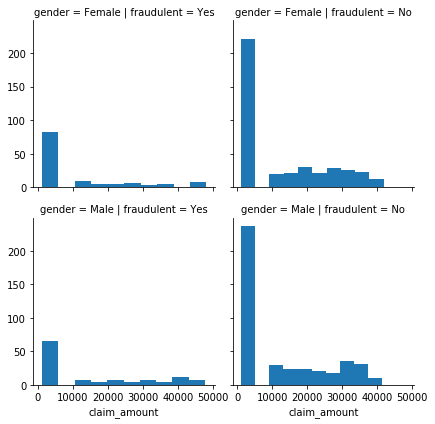

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
g = sns.FacetGrid(comb_df, col="fraudulent",  row="gender")
g = g.map(plt.hist,"claim_amount")

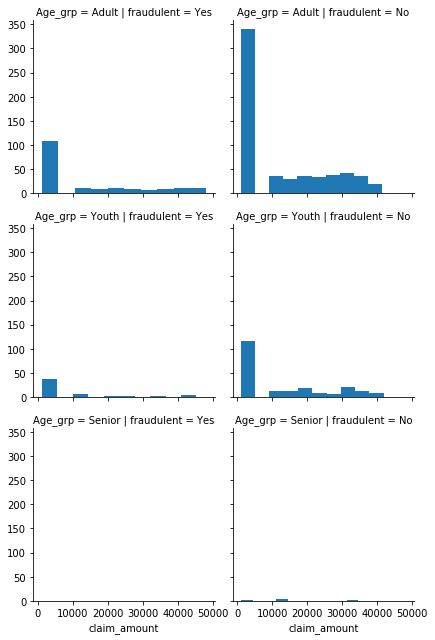

In [40]:
g = sns.FacetGrid(comb_df, col="fraudulent",  row="Age_grp")
g = g.map(plt.hist, "claim_amount")